# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

data = pd.merge(mouse_metadata, study_results, on= "Mouse ID") 
# Display the data table for preview

data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
group = data.groupby('Mouse ID')

In [73]:
group['Mouse ID'].count()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [74]:
mouse_metadata # Checing how the data looks like

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [75]:
study_results # Checing how the data looks like

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [76]:


num_mouse = data['Mouse ID'].nunique() # Checking the number of unique mice

In [77]:
# Checking the number of mice.
num_mouse

249

In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
A = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint'])]
A

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
g989data = data.loc[data['Mouse ID'] == 'g989']  # Not sure if we are suppose to drop all the data from g989

In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata = data.drop(data.index[(data['Mouse ID'] == 'g989')])

cleandata.loc[cleandata['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [81]:
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:

cleandata.duplicated().sum() # Check to see if there is any duplicate left

0

In [83]:
# Checking the number of mice in the clean DataFrame.

num_mouse_clean = cleandata['Mouse ID'].nunique()
num_mouse_clean

248

## Summary Statistics

In [84]:
groupdata = cleandata.groupby('Drug Regimen') # using groupby with Drug Regimen for later summary table

In [85]:
groupdata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [86]:
# Calculating statistic 
mean_tumor = groupdata['Tumor Volume (mm3)'].mean()
median_tumor =groupdata['Tumor Volume (mm3)'].median()
variance_tumor = groupdata['Tumor Volume (mm3)'].var()
std_tumor = groupdata['Tumor Volume (mm3)'].std()
sem_tumor = groupdata['Tumor Volume (mm3)'].sem()

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({'Mean Tumor Volume': mean_tumor,
                   'Median Tumor Volume': median_tumor,
                   'Tumor Volume Variance': variance_tumor,
                   'Tumor Volume Std. Dev.': std_tumor,
                   'Tumor Volume Std. Err.': sem_tumor})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleandata.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [89]:
reg_mouse = cleandata[['Drug Regimen', 'Mouse ID']] # Picking out the colums that we need

reg_mouse_index = reg_mouse.set_index('Drug Regimen') # setting the Drug Reigmen as index for easier understanding
reg_mouse_index.head()

,Mouse ID
Drug Regimen,
Ramicane,k403
Ramicane,k403
Ramicane,k403
Ramicane,k403
Ramicane,k403


In [90]:
reg_mouse_index_group = reg_mouse_index.groupby('Drug Regimen') # grouby for counting purpose

In [91]:
reg_mouse_count = reg_mouse_index_group['Mouse ID'].count() # Counting the number of Mouse ID relative to Drug Regimen
reg_mouse_count # Visualizing 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [92]:
sorted_reg_mouse_count = reg_mouse_count.sort_values(ascending= False) # Sorting the data for plotting
sorted_reg_mouse_count # Visualizing

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

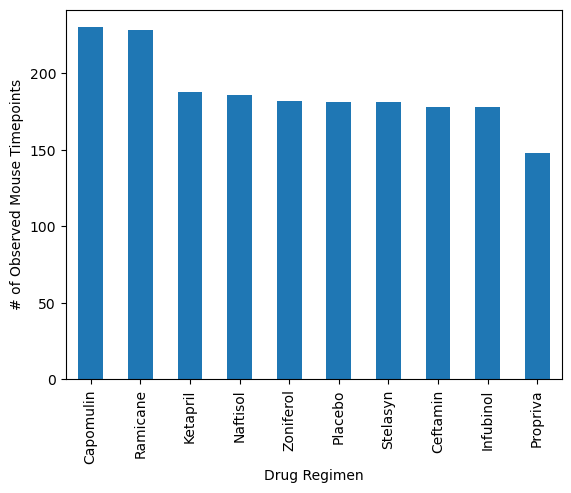

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sorted_reg_mouse_count.plot(kind = "bar", xlabel= "Drug Regimen", ylabel= "# of Observed Mouse Timepoints") # Plotting data using panda

In [94]:
sorted_reg_mouse_count_df = pd.DataFrame(sorted_reg_mouse_count) # Converting to data frame for use later

In [95]:
mx = np.arange(len(sorted_reg_mouse_count_df)) #mx = mouse-axis
tick_locations = [value for value in mx]

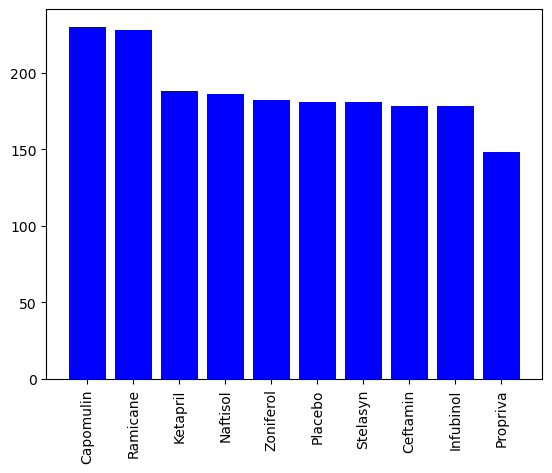

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mx, sorted_reg_mouse_count_df['Mouse ID'], color = 'b')
plt.xticks(tick_locations, sorted_reg_mouse_count_df.index,rotation = 'vertical')
plt.show()

In [97]:
mouse_sex = cleandata[['Mouse ID','Sex']] # Picking the colums we need, preparing for pie chart
mouse_sex.head()

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male


In [98]:
mouse_sex_group = mouse_sex.groupby('Sex') #Groupby sex, count and visualize data
mouse_sex_count = mouse_sex_group.count()

mouse_sex_count

,Mouse ID
Sex,
Female,922
Male,958


In [99]:
sorted_mouse_sex_count = mouse_sex_count.sort_values(by='Mouse ID', ascending= False)
sorted_mouse_sex_count  #Sorting the data

,Mouse ID
Sex,
Male,958
Female,922


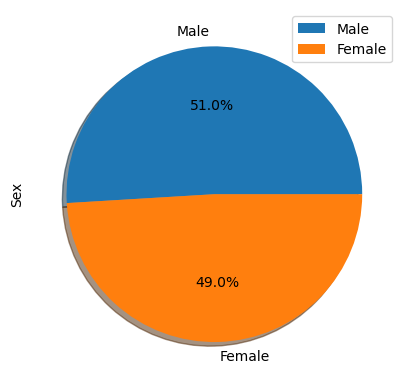

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie1 = sorted_mouse_sex_count.plot(kind ='pie', x = 'Sex' , y = 'Mouse ID', ylabel= 'Sex', shadow=True,autopct="%1.1f%%")


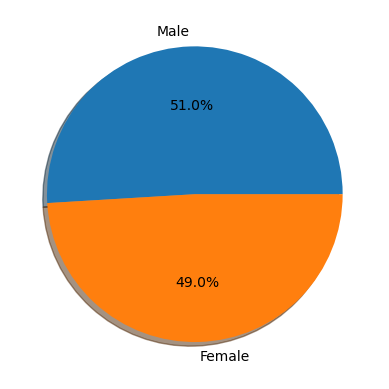

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = plt.pie(sorted_mouse_sex_count['Mouse ID'], labels = sorted_mouse_sex_count.index, shadow = True, autopct="%1.1f%%")

pie2
plt.show()

## Quartiles, Outliers and Boxplots

In [102]:
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filter_data_group = cleandata.groupby('Mouse ID').max()['Timepoint']

filter_data_group_max = pd.DataFrame(filter_data_group)

filter_data_group_max

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [104]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

adjust_data = pd.merge(filter_data_group_max, cleandata, how = 'left', on=('Mouse ID', 'Timepoint') )

adjust_data.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [105]:
adjust_data['Drug Regimen'].unique()  # Checking the number of drugs

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [106]:
df = adjust_data[['Drug Regimen', 'Tumor Volume (mm3)']]  # Picking the colums we need
df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Placebo,70.717621
3,Ceftamin,62.999356
4,Stelasyn,63.440686
...,...,...
243,Propriva,48.710661
244,Ramicane,30.638696
245,Infubinol,62.754451
246,Naftisol,65.741070


In [107]:
plot_data0 = adjust_data.groupby(['Drug Regimen', 'Mouse ID']) 
plot_data0.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [108]:
plot_data = plot_data0.agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[0]))  # Using agg to create our data.

plot_data

tumor_size
Drug Regimen Mouse ID            
Capomulin    b128       38.982878
             b742       38.939633
             f966       30.485985
             g288       37.074024
             g316       40.159220
...                           ...
Zoniferol    q633       70.827796
             s337       62.109651
             w140       47.717952
             w575       68.401286
             x613       48.077646

[248 rows x 1 columns]

In [109]:
plot_data_f = plot_data.stack(level=0)  # restructuring the data for later for loop, tumor_list.append

plot_data_f

Drug Regimen  Mouse ID            
Capomulin     b128      tumor_size    38.982878
              b742      tumor_size    38.939633
              f966      tumor_size    30.485985
              g288      tumor_size    37.074024
              g316      tumor_size    40.159220
                                        ...    
Zoniferol     q633      tumor_size    70.827796
              s337      tumor_size    62.109651
              w140      tumor_size    47.717952
              w575      tumor_size    68.401286
              x613      tumor_size    48.077646
Length: 248, dtype: float64

In [110]:
plot_data_f1 = plot_data_f.unstack(level = 0)  # restructuring the data for later for loop
plot_data_f1

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mouse ID,,,,,,,,,,,
a203,tumor_size,NaN,NaN,67.973419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a251,tumor_size,NaN,NaN,65.525743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a262,tumor_size,NaN,NaN,NaN,NaN,NaN,70.717621,NaN,NaN,NaN,NaN
a275,tumor_size,NaN,62.999356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a366,tumor_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.440686,NaN
...,...,...,...,...,...,...,...,...,...,...,...
z435,tumor_size,NaN,NaN,NaN,NaN,NaN,NaN,48.710661,NaN,NaN,NaN
z578,tumor_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.638696,NaN,NaN
z581,tumor_size,NaN,NaN,62.754451,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**For Loop Method**

In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

for treatments in treatments_list:
    print(treatments)


Capomulin
Ramicane
Infubinol
Ceftamin


In [112]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in treatments_list:
    tempdata1 = df.loc[df["Drug Regimen"] == treatments,:]
    quartiles = tempdata1.quantile([.25,.5,.75]).squeeze()
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    print(f"{treatments}'s potential outliers:")
    print(f'Values below {lower_bound.round(2)} could be outliers.')
    print(f'Values aboave {upper_bound.round(2)} could be outliers.\n')

    
    # Locate the rows which contain mice on each drug and get the tumor volumes


outlier_occupancy =df.loc[(df['Tumor Volume (mm3)'] < lower_bound) | (df['Tumor Volume (mm3)'] > upper_bound)]

print("Potential Outliers :")
outlier_occupancy
    
    # add subset 

    


Capomulin's potential outliers:
Values below 20.7 could be outliers.
Values aboave 51.83 could be outliers.

Ramicane's potential outliers:
Values below 17.91 could be outliers.
Values aboave 54.31 could be outliers.

Infubinol's potential outliers:
Values below 36.83 could be outliers.
Values aboave 82.74 could be outliers.

Ceftamin's potential outliers:
Values below 25.36 could be outliers.
Values aboave 87.67 could be outliers.

Potential Outliers :


C:\Users\Randg\AppData\Local\Temp\ipykernel_28732\201260025.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = tempdata1.quantile([.25,.5,.75]).squeeze()


,Drug Regimen,Tumor Volume (mm3)
96,Ramicane,22.050126
174,Capomulin,23.343598


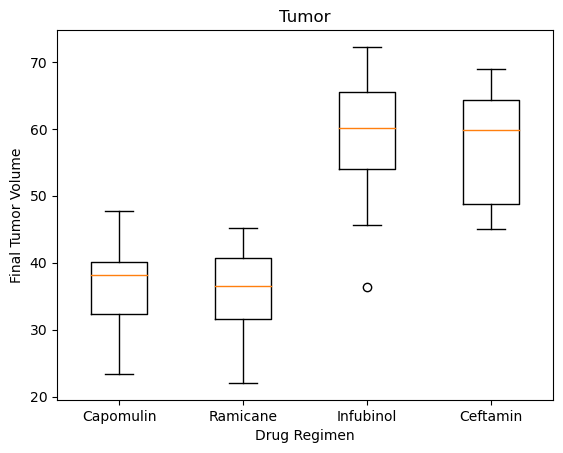

In [113]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_list = []
for treatments in treatments_list:
    tumor_list.append(list(plot_data_f[treatments].dropna()))   #appending plot_data_f['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'] into tumor_list with each loop
                                                                    #Each one is a series





#Plotting the box plot

fig1, ax1 = plt.subplots()

ax1.set_title('Tumor')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_list, labels = treatments_list) 
plt.show()

In [114]:
#---------------------------------------------------------------------

**Trying Different Method**

In [115]:
#Trying out other methods with dataframe

four_data = adjust_data.loc[(adjust_data['Drug Regimen']=='Capomulin')+ (adjust_data['Drug Regimen']=='Ramicane')
                          +(adjust_data['Drug Regimen']=='Infubinol')+(adjust_data['Drug Regimen']=='Ceftamin')]


four_data  # Using Loc to filter the data for the four Regimen

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [116]:
four_data['Drug Regimen'].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [117]:
tumor_mouse_reg = four_data[['Drug Regimen', 'Tumor Volume (mm3)']]  # Creating new dataframe with the colums we want
tumor_mouse_reg

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [118]:
sorted_tumor_mouse_reg = tumor_mouse_reg.sort_values(by= 'Tumor Volume (mm3)', ascending= False)

In [119]:
tumor_mouse_reg['Drug Regimen'].unique() # Checking if the data contains the  correct info

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [120]:
tumor_mouse_reg_index = tumor_mouse_reg.set_index('Drug Regimen')  #setting Drug Regimen as index

tumor_mouse_reg_index

,Tumor Volume (mm3)
Drug Regimen,
Infubinol,67.973419
Infubinol,65.525743
Ceftamin,62.999356
Ramicane,38.407618
Ramicane,43.047543
...,...
Ceftamin,68.594745
Capomulin,31.896238
Ceftamin,64.729837


In [131]:
reset_index =  tumor_mouse_reg.reset_index(drop= True) # Or resetting index
reset_index

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


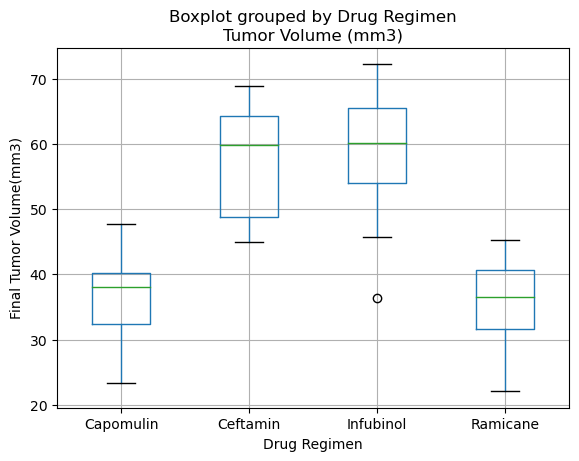

In [132]:
# Box plot with setting new index
box = tumor_mouse_reg_index.boxplot(column= 'Tumor Volume (mm3)',by= 'Drug Regimen', ylabel = 'Final Tumor Volume(mm3)') 

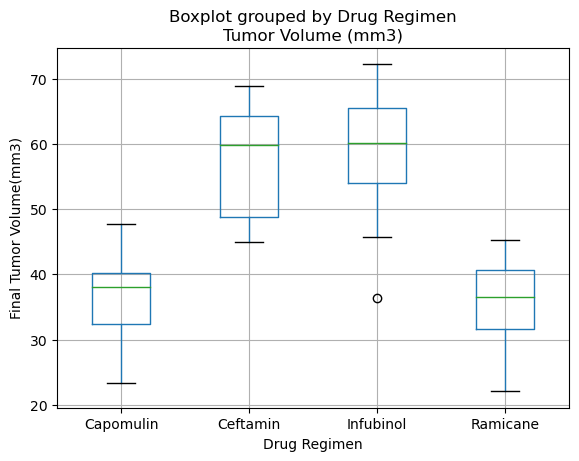

In [133]:
# Box plot with resettting index
box2 = reset_index.boxplot(column= 'Tumor Volume (mm3)',by= 'Drug Regimen', ylabel = 'Final Tumor Volume(mm3)')

In [122]:
# -----------------------------------------------------------------------------------

## Line and Scatter Plots

In [123]:
capodata = cleandata.loc[(cleandata['Drug Regimen'] == 'Capomulin')] # Looking for mouse treated with Capomulin
capodata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [124]:
line_df = capodata.loc[(capodata['Mouse ID'] == 'l509')]  # Trying to match the graph
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

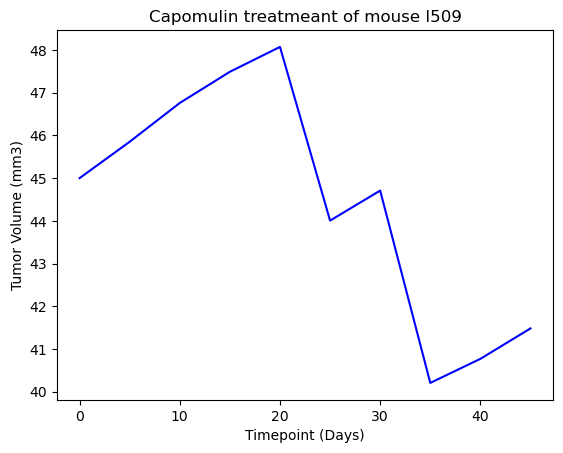

In [125]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, bx1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatterdata = capodata.groupby(['Mouse ID', 'Weight (g)'])[['Tumor Volume (mm3)']].agg(['mean'])
scatterdata                                             # Found out later couldn't use this data for plot

,,Tumor Volume (mm3)
,,mean
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236


In [127]:
cap_mean =capodata.groupby(['Mouse ID']).mean()  #agg doesn't work, resort back to old method
cap_mean

C:\Users\Randg\AppData\Local\Temp\ipykernel_28732\2653090697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_mean =capodata.groupby(['Mouse ID']).mean()  #agg doesn't work, resort back to old method


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

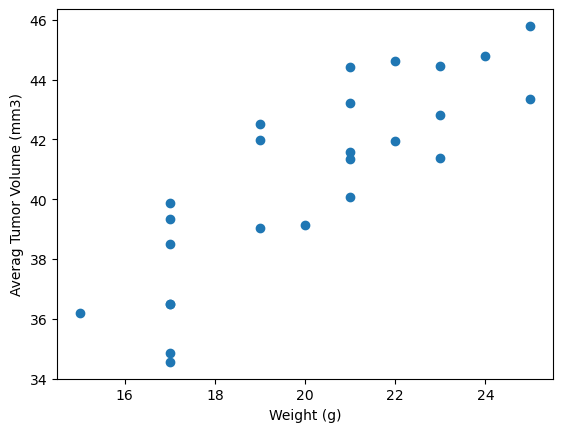

In [128]:
fig1, cx1 = plt.subplots()
scatterx = cap_mean['Weight (g)']
scattery = cap_mean['Tumor Volume (mm3)']

plt.scatter(scatterx, scattery)

plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [129]:
from scipy.stats import linregress

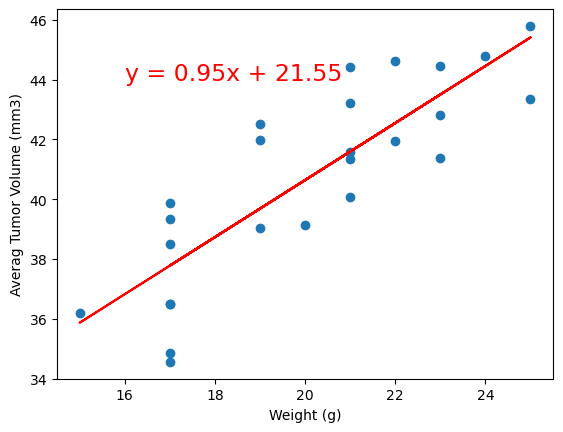

In [130]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatterx, scattery)
regression = scatterx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(scatterx,scattery)
plt.plot(scatterx,regression,"r-")
plt.annotate(line_eq,(16,44),fontsize=17,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()